In [12]:
import pandas as pd

# Load the CompanyValues.csv file
company_values_df = pd.read_csv('data/CompanyValues.csv')

# Convert 'day_date' column to datetime format
company_values_df['day_date'] = pd.to_datetime(company_values_df['day_date'])

# Filter rows with dates from 2015 onwards
company_values_df = company_values_df[company_values_df['day_date'].dt.year >= 2015]

# Display the first few rows of the filtered DataFrame
print(company_values_df.head())


  ticker_symbol   day_date  close_value    volume  open_value  high_value  \
0          AAPL 2020-05-29       317.94  38399530      319.25      321.15   
1          AAPL 2020-05-28       318.25  33449100      316.77      323.44   
2          AAPL 2020-05-27       318.11  28236270      316.14      318.71   
3          AAPL 2020-05-26       316.73  31380450      323.50      324.24   
4          AAPL 2020-05-22       318.89  20450750      315.77      319.23   

   low_value  
0     316.47  
1     315.63  
2     313.09  
3     316.50  
4     315.35  


In [7]:
import pandas as pd
tweet_affection_df = pd.read_csv('Tweet_Affection.csv')

# Convert date columns to datetime format
tweet_affection_df['post_date'] = pd.to_datetime(tweet_affection_df['post_date'], unit='s')

# Display the first few rows of the Tweet_Affection DataFrame
print(tweet_affection_df.head())

             tweet_id ticker_symbol company_name      writer  \
0  550803612197457920          AAPL        apple  SentiQuant   
1  550803612197457920          AMZN   Amazon.com  SentiQuant   
2  550803610825928706          AAPL        apple  SentiQuant   
3  550803610825928706         GOOGL   Google Inc  SentiQuant   
4  550803610825928706          AMZN   Amazon.com  SentiQuant   

            post_date                                               body  \
0 2015-01-01 23:59:49  #TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...   
1 2015-01-01 23:59:49  #TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...   
2 2015-01-01 23:59:48  #SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...   
3 2015-01-01 23:59:48  #SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...   
4 2015-01-01 23:59:48  #SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...   

   comment_num  retweet_num  like_num  \
0            0            0         1   
1            0            0         1   
2            0            0        

In [17]:
# Merge DataFrames based on common columns
merged_df = pd.merge(company_values_df, tweet_affection_df, left_on=['ticker_symbol', 'day_date'], right_on=['ticker_symbol', 'post_date'], how='inner')
print('done')


done


In [18]:
# Step 2: Feature Engineering (if needed)
# Calculate daily change in stock price as a target variable
merged_df['daily_change'] = merged_df.groupby('ticker_symbol')['close_value'].diff()
print('done')

done


In [20]:
# Step 3: Model Training
# Example: Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = merged_df[['sentiment']]  # Features: Sentiment scores from tweets
y = merged_df['daily_change']  # Target: Daily change in stock price



In [26]:
import numpy as np
nan_indices = np.isnan(y)
print("NaN values in Y:", np.sum(nan_indices))

# Find the index of the NaN value in Y
nan_index = np.argwhere(np.isnan(y))

# Remove the corresponding sample from both x and Y
X = np.delete(X, nan_index, axis=0)
y = np.delete(y, nan_index)

nan_indices = np.isnan(y)
print("NaN values in Y:", np.sum(nan_indices))

NaN values in Y: 0
NaN values in Y: 0


In [29]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
print('done')

done


In [30]:
# Step 4: Model Evaluation
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 53646.78944574903


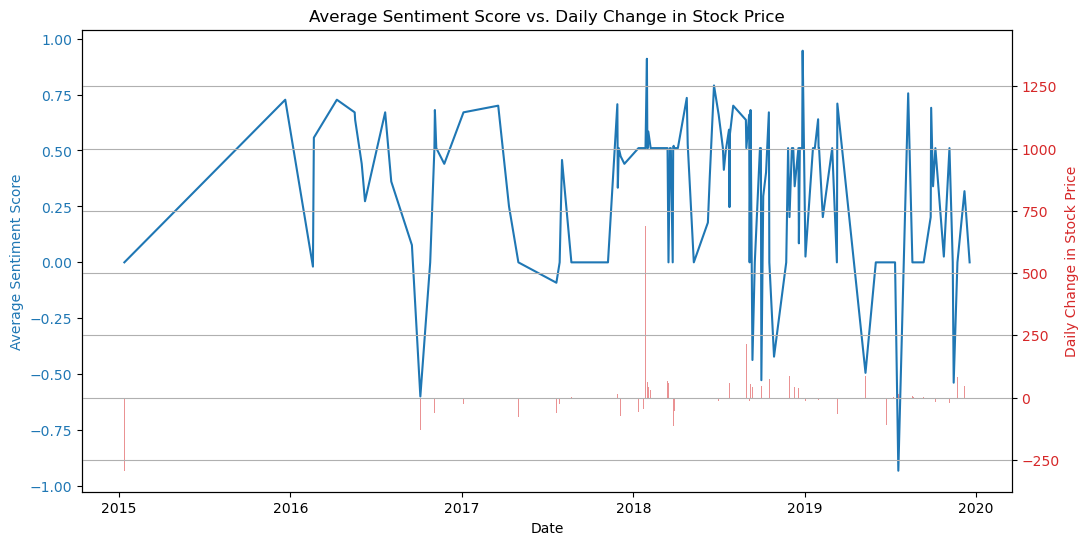

In [36]:
# Step 5: Visualization
import matplotlib.pyplot as plt

# Calculate average sentiment score and daily change in stock price for each day
avg_sentiment = merged_df.groupby('day_date')['sentiment'].mean()
daily_change = merged_df.groupby('day_date')['daily_change'].mean()

# Create subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot average sentiment score (line plot)
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Sentiment Score', color=color)
ax1.plot(avg_sentiment.index, avg_sentiment.values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a secondary y-axis for daily change in stock price (bar plot)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Daily Change in Stock Price', color=color)
ax2.bar(daily_change.index, daily_change.values, color=color, alpha=0.5)
ax2.tick_params(axis='y', labelcolor=color)

# Add title and legend
plt.title('Average Sentiment Score vs. Daily Change in Stock Price')
plt.grid(True)
plt.show()

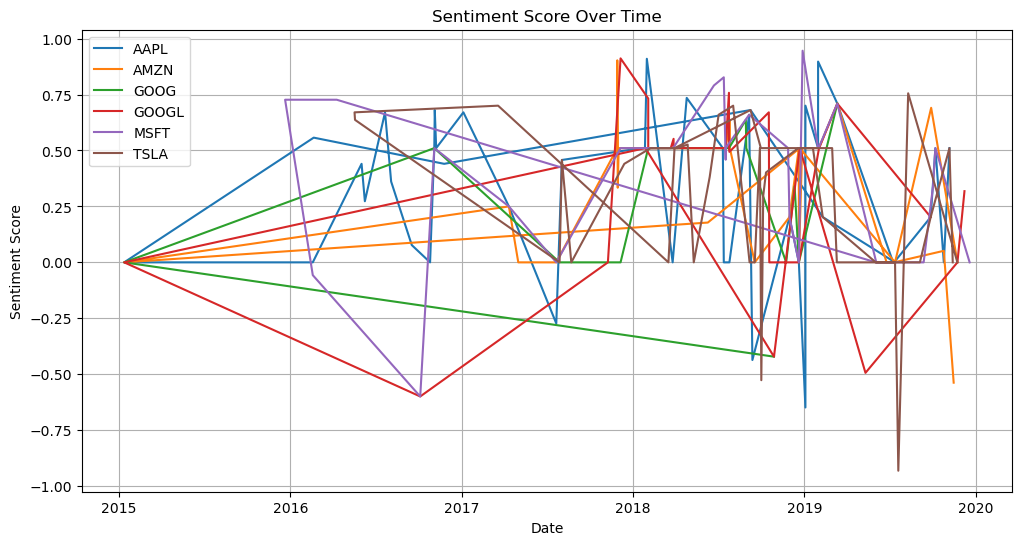

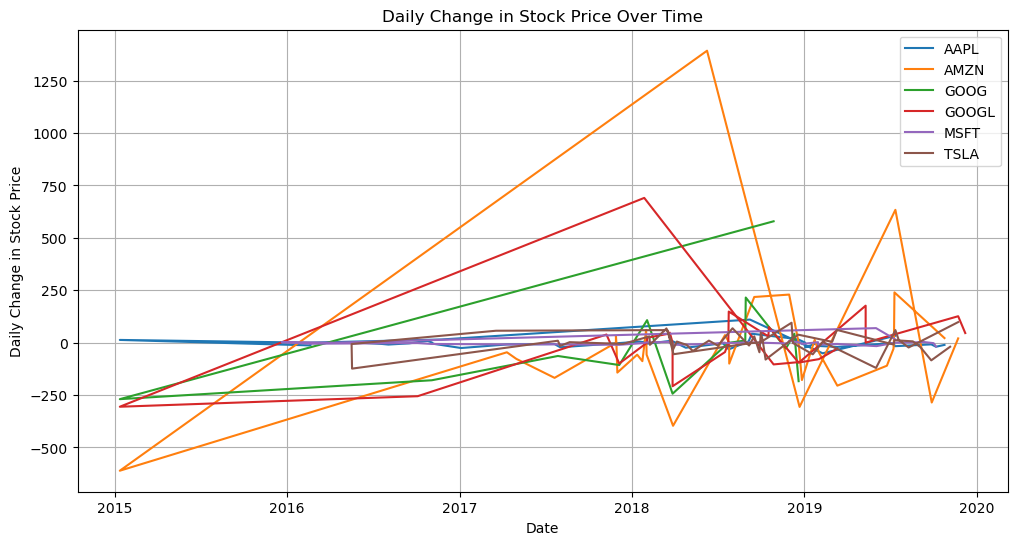

In [37]:

import matplotlib.pyplot as plt

# Define a function to plot time series
def plot_time_series(data, x, y, title):
    plt.figure(figsize=(12, 6))
    for company, df in data.groupby('ticker_symbol'):
        plt.plot(df[x], df[y], label=company)
    plt.xlabel('Date')
    plt.ylabel(title)
    plt.title(title + ' Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot time series of sentiment scores
plot_time_series(merged_df, 'day_date', 'sentiment', 'Sentiment Score')

# Plot time series of daily changes in stock price
plot_time_series(merged_df, 'day_date', 'daily_change', 'Daily Change in Stock Price')
